In [1]:
!pip install skl2onnx

In [2]:
!pip install onnx==1.16.0 onnxmltools

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, \
                    cross_val_score
import warnings
warnings.filterwarnings("ignore")

import joblib
from google.colab import files
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import onnxmltools
from onnxmltools.convert.common.data_types import FloatTensorType
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
stunting_df = pd.read_csv('/content/drive/MyDrive/Laskar Ai/Prediksi Stunting/Dataset/data-stunting.csv')
stunting_df.T

,0,1,2,3,4,5,6,7,8,9,...,4514,4515,4516,4517,4518,4519,4520,4521,4522,4523
sex,Laki-laki,Perempuan,Laki-laki,Laki-laki,Perempuan,Laki-laki,Perempuan,Laki-laki,Perempuan,Laki-laki,...,Perempuan,Perempuan,Perempuan,Laki-laki,Perempuan,Perempuan,Laki-laki,Laki-laki,Perempuan,Laki-laki
age_months,44,30,39,12,7,42,11,54,43,57,...,33,31,24,6,10,34,36,26,14,55
weight,13.1,10.0,11.5,8.5,8.3,12.7,9.2,19.3,13.8,16.0,...,10.1,11.9,9.3,8.5,10.8,14.4,10.9,13.2,8.8,14.2
height,89.1,80.6,87.0,69.9,67.6,91.9,72.9,105.4,95.7,102.4,...,82.5,85.1,80.2,69.3,85.0,93.8,84.4,84.5,68.7,99.9
postnatal,No,Yes,No,No,Yes,Yes,No,No,No,No,...,Yes,No,No,No,No,No,No,No,No,No
birth_weight,3.0,3.0,3.0,3.0,3.5,3.0,3.0,3.1,3.5,3.0,...,3.05,2.4,2.03,3.3,4.1,2.8,2.55,2.9,3.75,3.0
asi,24,9,12,24,24,24,24,8,12,12,...,24,24,12,24,3,4,20,12,24,26
prenatal,9,9,9,9,9,4,5,4,9,9,...,9,3,8,4,7,6,6,9,8,11
ubi_week,0,0,0,0,0,0,0,0,0,0,...,1,1,2,0,1,0,1,0,0,0
telur_week,0,0,0,2,0,2,3,1,0,2,...,2,7,3,0,0,1,2,7,0,7


In [7]:
stunting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4524 entries, 0 to 4523
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4524 non-null   object 
 1   age_months       4524 non-null   int64  
 2   weight           4524 non-null   float64
 3   height           4524 non-null   float64
 4   postnatal        4524 non-null   object 
 5   birth_weight     4524 non-null   float64
 6   asi              4524 non-null   int64  
 7   prenatal         4524 non-null   int64  
 8   ubi_week         4524 non-null   int64  
 9   telur_week       4524 non-null   int64  
 10  ikan_week        4524 non-null   int64  
 11  daging_week      4524 non-null   int64  
 12  susu_week        4524 non-null   int64  
 13  sayur_week       4524 non-null   int64  
 14  pisang_week      4524 non-null   int64  
 15  pepaya_week      4524 non-null   int64  
 16  wortel_week      4524 non-null   int64  
 17  mangga_week   

In [8]:
# Deteksi missing values
stunting_df.isna().sum()

,0
sex,0
age_months,0
weight,0
height,0
postnatal,0
birth_weight,0
asi,0
prenatal,0
ubi_week,0
telur_week,0


In [9]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
stunting_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age_months,4524.0,3.151216e+01,1.613832e+01,1.0,18.0,32.0,45.0,5.900000e+01
weight,4524.0,1.200351e+01,3.525681e+00,3.2,9.5,11.7,14.0,2.990000e+01
height,4524.0,8.671123e+01,1.223767e+01,48.0,77.4,87.2,95.9,1.268000e+02
birth_weight,4524.0,3.142708e+00,4.566680e-01,2.0,2.9,3.1,3.5,4.400000e+00
asi,4524.0,1.865628e+01,8.267934e+00,0.0,14.0,24.0,24.0,3.800000e+01
prenatal,4524.0,8.301503e+00,1.964461e+00,1.0,8.0,9.0,9.0,2.100000e+01
ubi_week,4524.0,4.173298e-01,9.943552e-01,0.0,0.0,0.0,0.0,7.000000e+00
telur_week,4524.0,2.842175e+00,2.392010e+00,0.0,1.0,2.0,4.0,7.000000e+00
ikan_week,4524.0,2.535588e+00,2.562302e+00,0.0,0.0,2.0,4.0,7.000000e+00
daging_week,4524.0,1.285588e+00,1.719497e+00,0.0,0.0,1.0,2.0,7.000000e+00


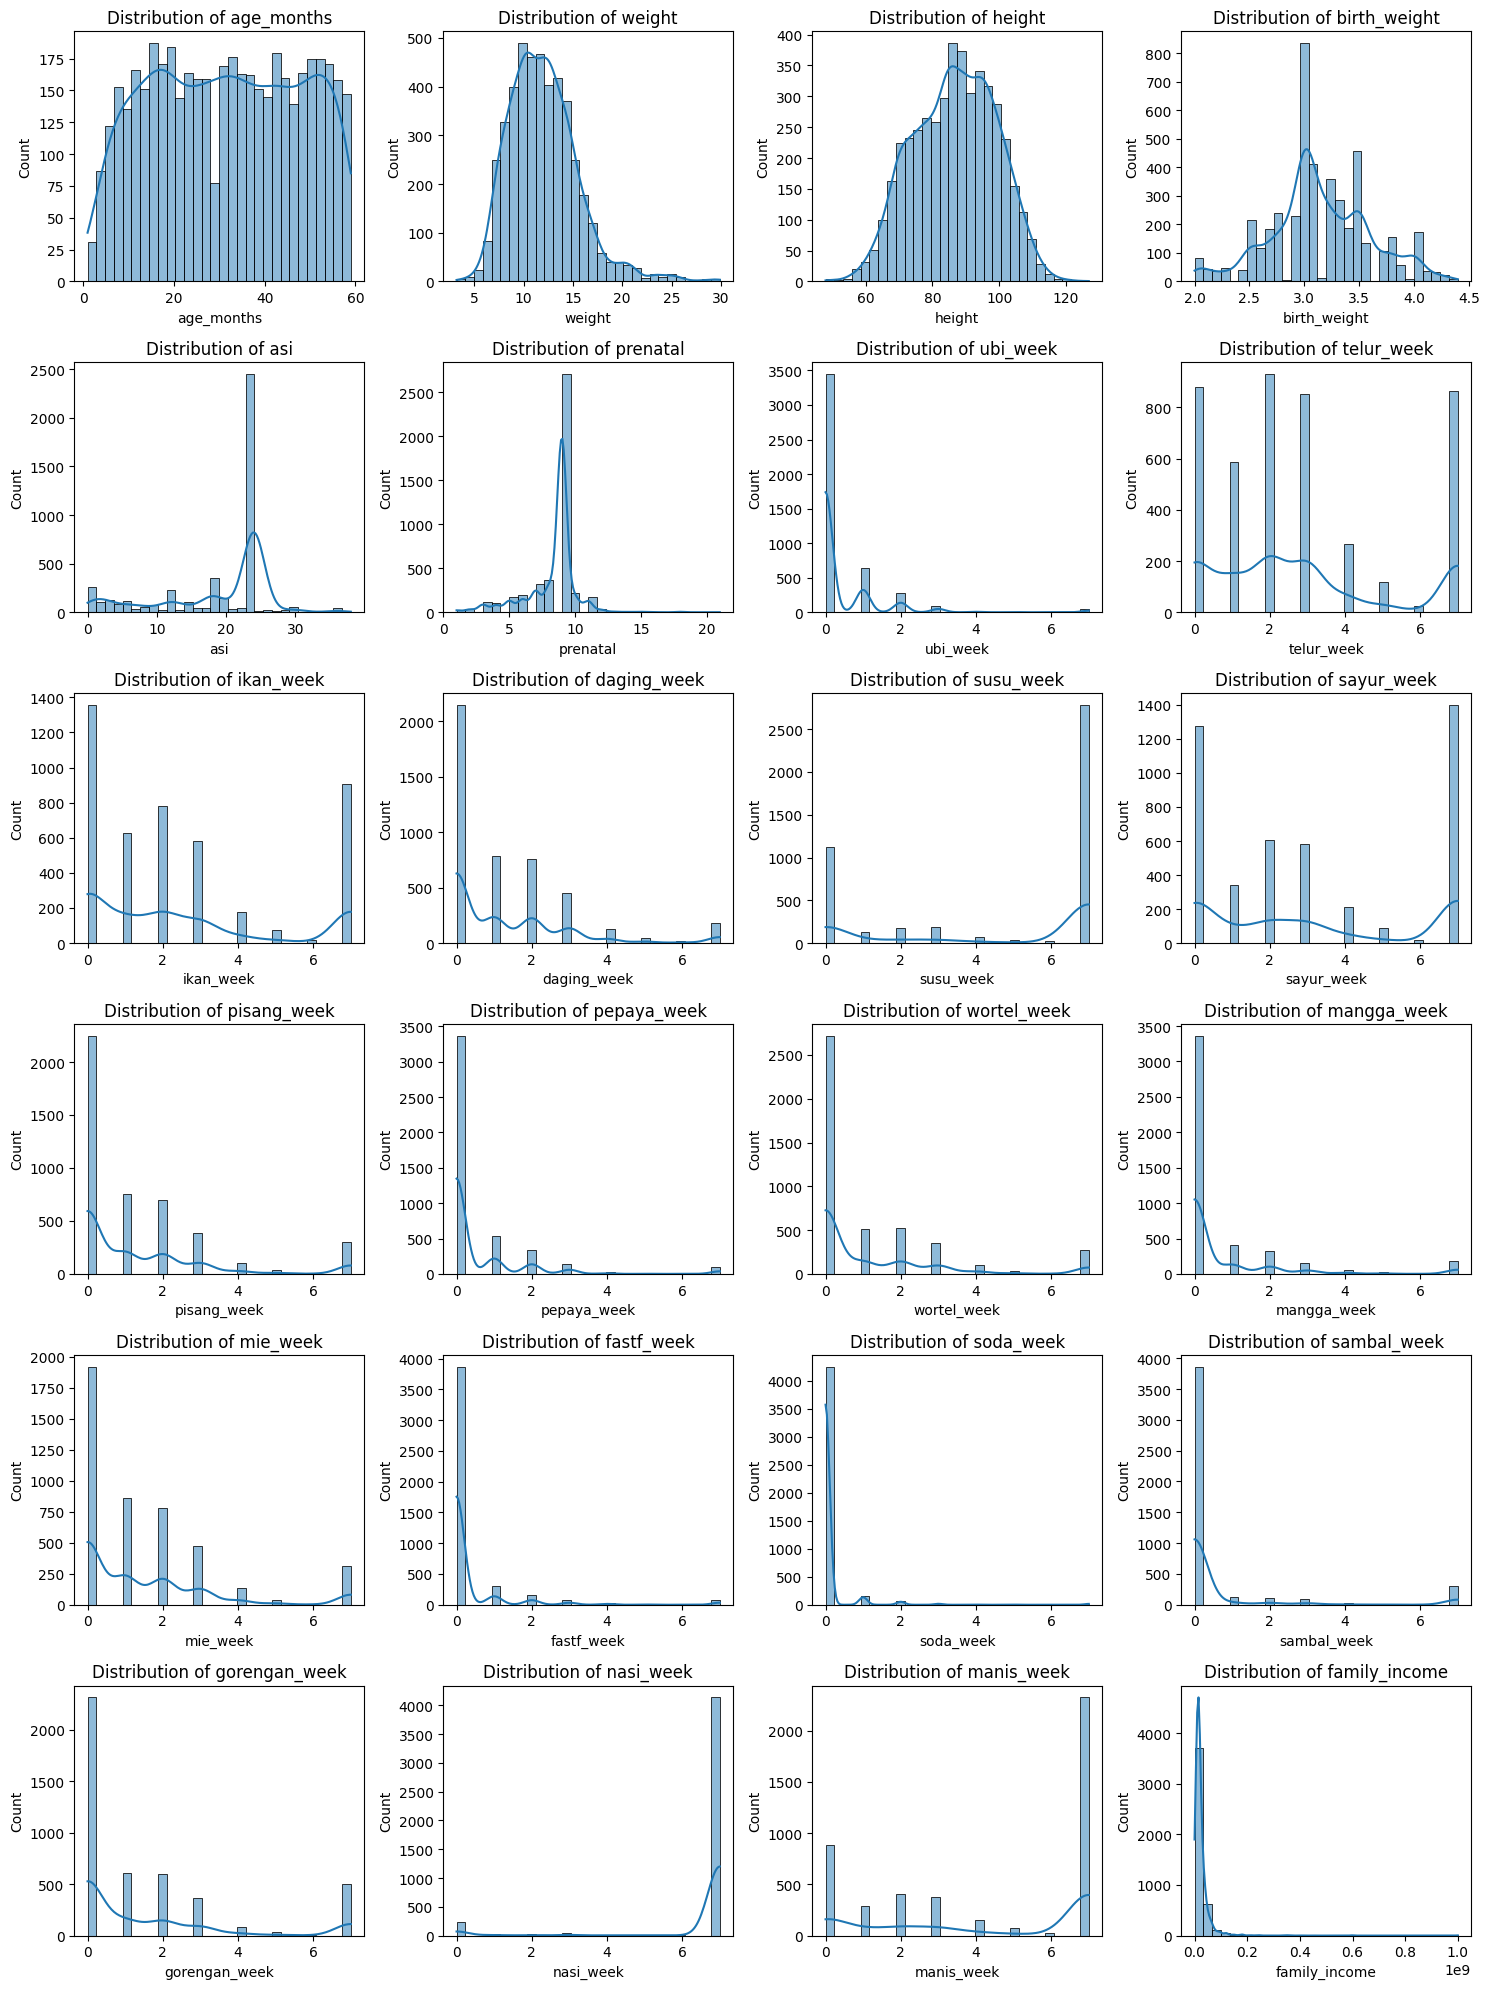

In [10]:
# Distribusi data untuk kolom numerik
numeric_columns = stunting_df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 20))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 4, i)
    sns.histplot(stunting_df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

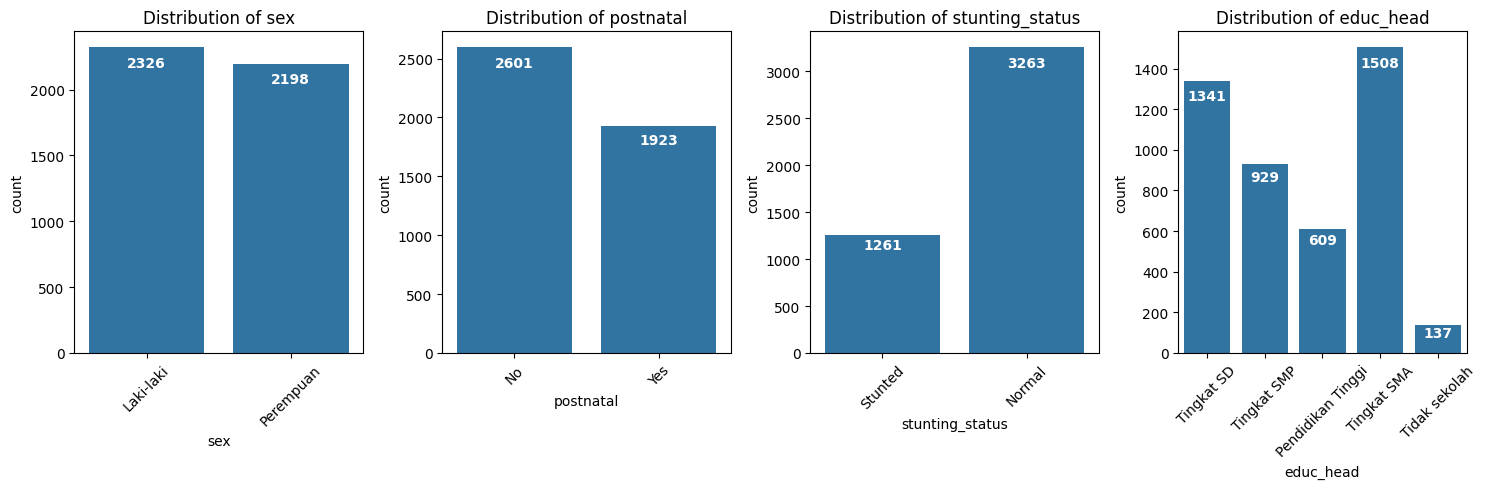

In [11]:
# Visualisasi data variabel kategorik

category_columns = stunting_df.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(15, 5))
for i, column in enumerate(category_columns, 1):
    plt.subplot(1, 4, i)
    ax = sns.countplot(x=stunting_df[column])
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,
            height - (0.03 * height),
            f'{int(height)}',
            ha='center',
            va='top',
            color='white',
            fontsize=10,
            fontweight='bold'
        )

plt.tight_layout()
plt.show()

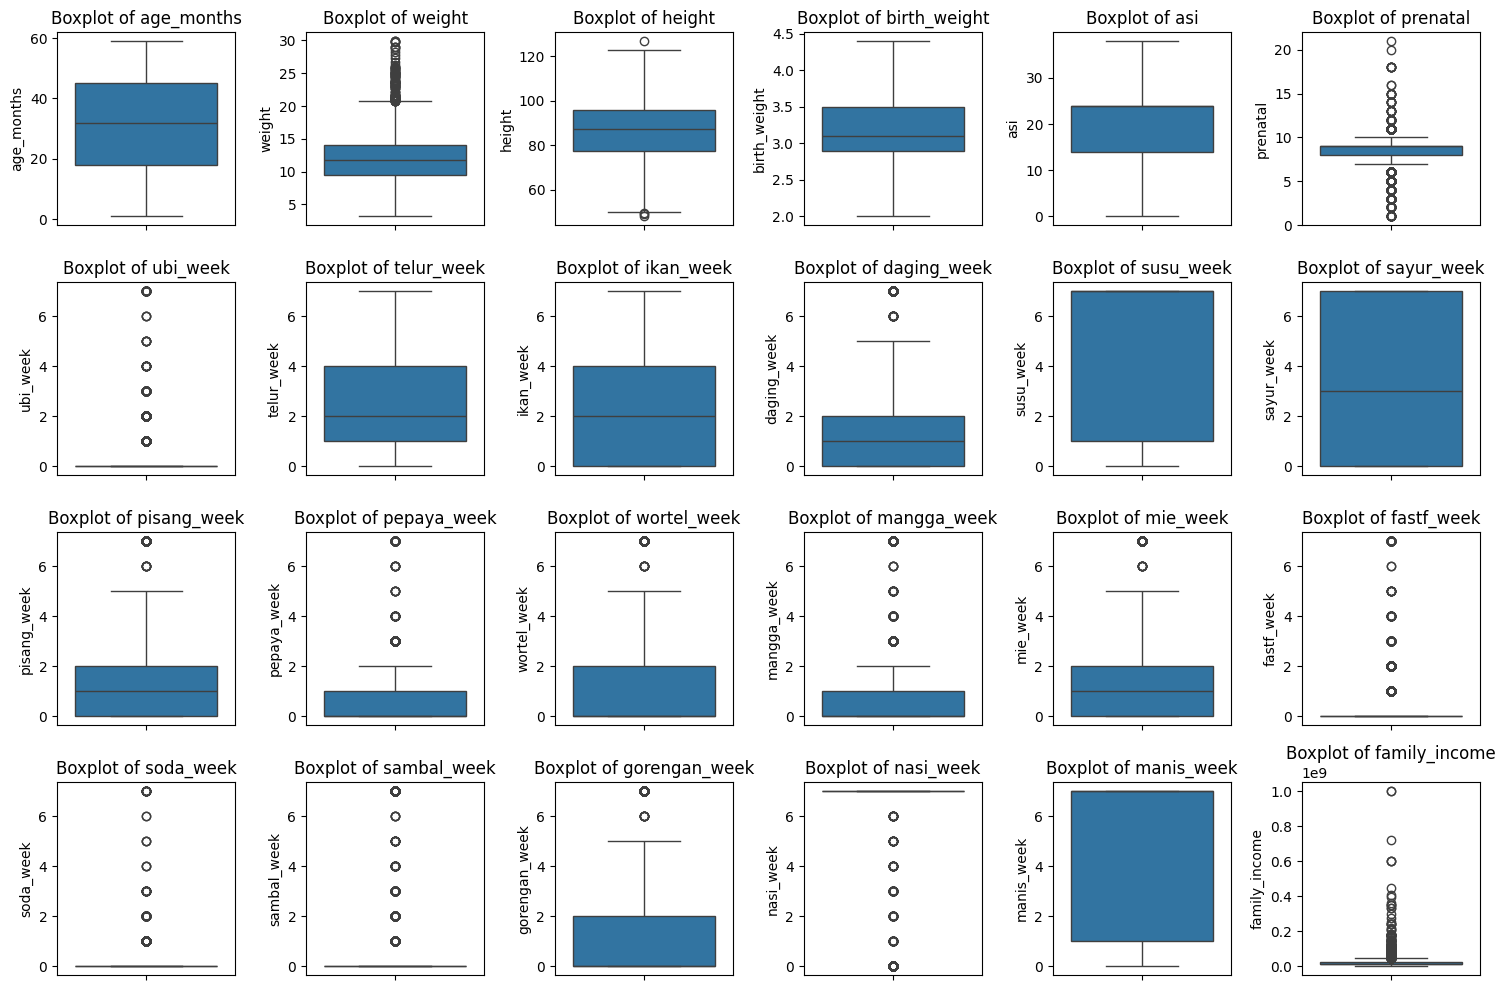

In [12]:
# Mendeteksi Outlier

numeric_cols = stunting_df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(4, 6, i)
    sns.boxplot(stunting_df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [13]:
# Korelasi antar variabel numerik dengan correlation matrix

stunting_df.select_dtypes(include='number').corr()

,age_months,weight,height,birth_weight,asi,prenatal,ubi_week,telur_week,ikan_week,daging_week,...,wortel_week,mangga_week,mie_week,fastf_week,soda_week,sambal_week,gorengan_week,nasi_week,manis_week,family_income
age_months,1.000000,0.745668,0.890712,-0.000016,-0.084187,0.007381,0.076081,0.273060,0.187214,0.180901,...,-0.127240,0.142718,0.305383,0.084302,0.102047,0.183735,0.185772,0.327864,0.251762,-0.016368
weight,0.745668,1.000000,0.845915,0.113812,-0.161703,0.055301,0.044963,0.251292,0.135616,0.210270,...,-0.042865,0.059415,0.200114,0.112625,0.070275,0.136187,0.136647,0.290997,0.193958,0.072078
height,0.890712,0.845915,1.000000,0.065618,-0.142636,0.031790,0.074504,0.291083,0.192386,0.219114,...,-0.071104,0.094298,0.266698,0.107065,0.096288,0.166407,0.163095,0.357896,0.250761,0.042396
birth_weight,-0.000016,0.113812,0.065618,1.000000,0.007729,0.042241,0.031325,0.035336,0.037903,0.009267,...,0.006150,0.025192,-0.005924,0.003842,0.000527,0.041793,0.004469,0.000201,0.018594,0.007818
asi,-0.084187,-0.161703,-0.142636,0.007729,1.000000,0.027930,0.015543,-0.028445,-0.034504,-0.036794,...,-0.038197,0.045530,-0.007354,0.000236,-0.006126,-0.014598,0.023871,-0.044535,-0.057850,-0.021931
prenatal,0.007381,0.055301,0.031790,0.042241,0.027930,1.000000,-0.003196,0.031866,-0.055719,0.087017,...,0.041587,0.017864,-0.008555,0.025616,-0.022023,-0.069080,0.025041,-0.016665,0.020226,0.035774
ubi_week,0.076081,0.044963,0.074504,0.031325,0.015543,-0.003196,1.000000,0.121489,0.091880,0.064759,...,0.049223,0.107612,0.089049,0.046144,0.063405,0.072573,0.153914,0.079042,0.074858,-0.027186
telur_week,0.273060,0.251292,0.291083,0.035336,-0.028445,0.031866,0.121489,1.000000,0.095463,0.200497,...,0.067252,0.132207,0.289719,0.086645,0.074272,0.012573,0.206204,0.237699,0.215019,0.041429
ikan_week,0.187214,0.135616,0.192386,0.037903,-0.034504,-0.055719,0.091880,0.095463,1.000000,0.094241,...,-0.032152,0.076130,0.173275,0.038130,0.111611,0.174395,0.093573,0.226057,0.154038,0.032009
daging_week,0.180901,0.210270,0.219114,0.009267,-0.036794,0.087017,0.064759,0.200497,0.094241,1.000000,...,0.113743,0.075845,0.105756,0.127750,0.088422,0.016973,0.088421,0.164354,0.162940,0.124930


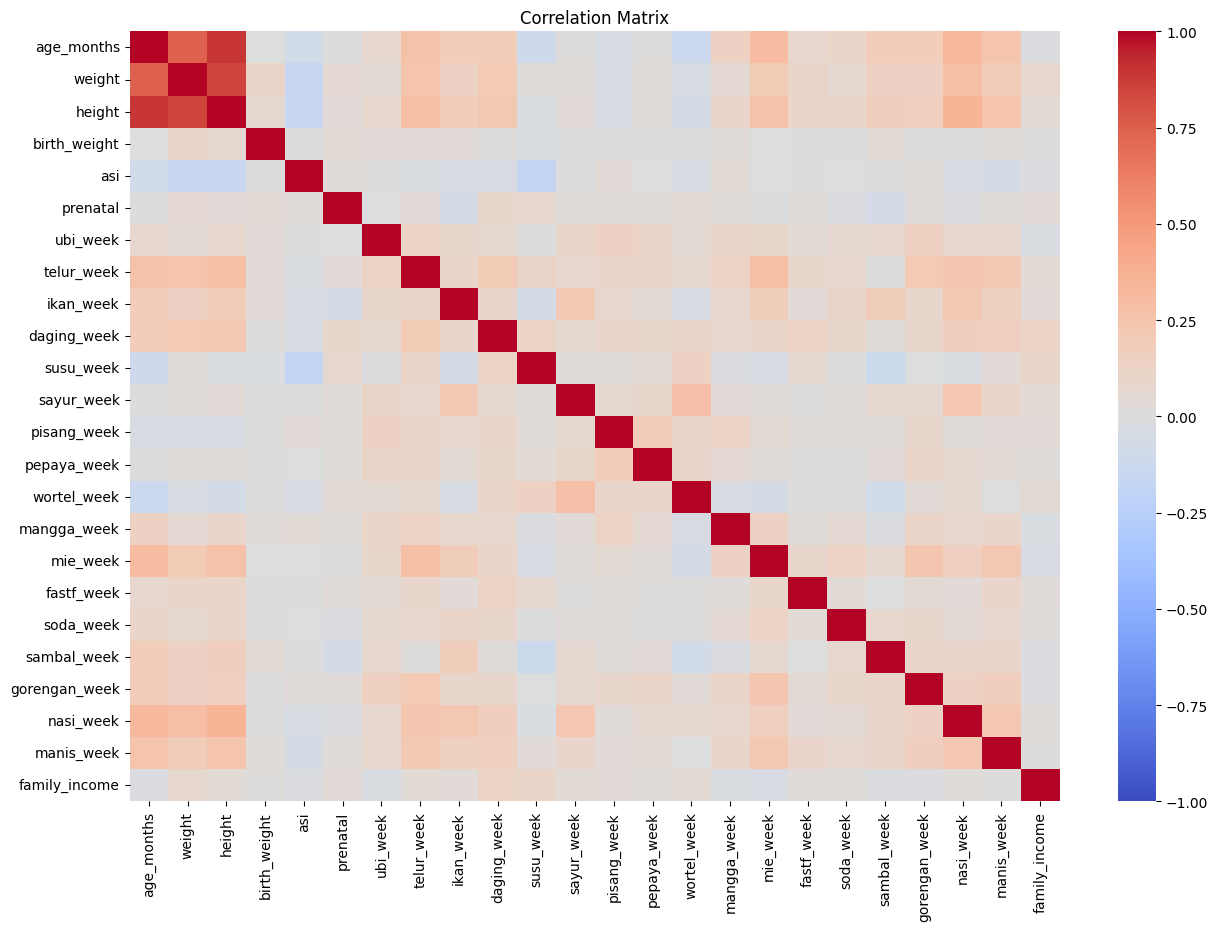

In [14]:
plt.figure(figsize=(15, 10))
correlation_matrix = stunting_df.select_dtypes(include='number').corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [15]:
# Label Endocer untuk variabel kategori

# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = stunting_df.select_dtypes(include=['object', 'category']).columns

# Encode kolom kategorikal
for column in categorical_columns:
    stunting_df[column] = label_encoder.fit_transform(stunting_df[column])

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
stunting_df.T

,0,1,2,3,4,5,6,7,8,9,...,4514,4515,4516,4517,4518,4519,4520,4521,4522,4523
sex,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.00,1.0,1.00,0.0,1.0,1.0,0.00,0.0,1.00,0.0
age_months,44.0,30.0,39.0,12.0,7.0,42.0,11.0,54.0,43.0,57.0,...,33.00,31.0,24.00,6.0,10.0,34.0,36.00,26.0,14.00,55.0
weight,13.1,10.0,11.5,8.5,8.3,12.7,9.2,19.3,13.8,16.0,...,10.10,11.9,9.30,8.5,10.8,14.4,10.90,13.2,8.80,14.2
height,89.1,80.6,87.0,69.9,67.6,91.9,72.9,105.4,95.7,102.4,...,82.50,85.1,80.20,69.3,85.0,93.8,84.40,84.5,68.70,99.9
postnatal,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0
birth_weight,3.0,3.0,3.0,3.0,3.5,3.0,3.0,3.1,3.5,3.0,...,3.05,2.4,2.03,3.3,4.1,2.8,2.55,2.9,3.75,3.0
asi,24.0,9.0,12.0,24.0,24.0,24.0,24.0,8.0,12.0,12.0,...,24.00,24.0,12.00,24.0,3.0,4.0,20.00,12.0,24.00,26.0
prenatal,9.0,9.0,9.0,9.0,9.0,4.0,5.0,4.0,9.0,9.0,...,9.00,3.0,8.00,4.0,7.0,6.0,6.00,9.0,8.00,11.0
ubi_week,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.00,1.0,2.00,0.0,1.0,0.0,1.00,0.0,0.00,0.0
telur_week,0.0,0.0,0.0,2.0,0.0,2.0,3.0,1.0,0.0,2.0,...,2.00,7.0,3.00,0.0,0.0,1.0,2.00,7.0,0.00,7.0


In [16]:
# Standarisasi variabel numerik
numeric_columns = stunting_df.select_dtypes(include=['number']).columns.drop('stunting_status')

# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
stunting_df[numeric_columns] = scaler.fit_transform(stunting_df[numeric_columns])

stunting_df.T

,0,1,2,3,4,5,6,7,8,9,...,4514,4515,4516,4517,4518,4519,4520,4521,4522,4523
sex,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
age_months,0.741379,0.500000,0.655172,0.189655,0.103448,0.706897,0.172414,0.913793,0.724138,0.965517,...,0.551724,0.517241,0.396552,0.086207,0.155172,0.568966,0.603448,0.431034,0.224138,0.931034
weight,0.370787,0.254682,0.310861,0.198502,0.191011,0.355805,0.224719,0.602996,0.397004,0.479401,...,0.258427,0.325843,0.228464,0.198502,0.284644,0.419476,0.288390,0.374532,0.209738,0.411985
height,0.521574,0.413706,0.494924,0.277919,0.248731,0.557107,0.315990,0.728426,0.605330,0.690355,...,0.437817,0.470812,0.408629,0.270305,0.469543,0.581218,0.461929,0.463198,0.262690,0.658629
postnatal,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
birth_weight,0.416667,0.416667,0.416667,0.416667,0.625000,0.416667,0.416667,0.458333,0.625000,0.416667,...,0.437500,0.166667,0.012500,0.541667,0.875000,0.333333,0.229167,0.375000,0.729167,0.416667
asi,0.631579,0.236842,0.315789,0.631579,0.631579,0.631579,0.631579,0.210526,0.315789,0.315789,...,0.631579,0.631579,0.315789,0.631579,0.078947,0.105263,0.526316,0.315789,0.631579,0.684211
prenatal,0.400000,0.400000,0.400000,0.400000,0.400000,0.150000,0.200000,0.150000,0.400000,0.400000,...,0.400000,0.100000,0.350000,0.150000,0.300000,0.250000,0.250000,0.400000,0.350000,0.500000
ubi_week,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.142857,0.142857,0.285714,0.000000,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000
telur_week,0.000000,0.000000,0.000000,0.285714,0.000000,0.285714,0.428571,0.142857,0.000000,0.285714,...,0.285714,1.000000,0.428571,0.000000,0.000000,0.142857,0.285714,1.000000,0.000000,1.000000


In [17]:
# Pisahkah fitur (X) dan target (Y)
X = stunting_df.drop('stunting_status',axis = 1)
y = stunting_df['stunting_status']

In [18]:
# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(3619, 27), y_train=(3619,)
Test set shape: X_test=(905, 27), y_test=(905,)


In [19]:
estimator = RandomForestClassifier(random_state=1).fit(X_train, y_train)
estimator_kn = LogisticRegression().fit(X_train, y_train)
estimators = [('rf', estimator),
              ('kn', estimator_kn)]
param_grid = {"max_depth": [3, None], "min_samples_split": [5, 10]}

model_dict = {
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'BernoulliNB': BernoulliNB(),
    'CalibratedClassifierCV': CalibratedClassifierCV(),
    'CategoricalNB': CategoricalNB(min_categories=75),
    'ComplementNB': ComplementNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'DummyClassifier': DummyClassifier(strategy="most_frequent", random_state=1),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'GaussianNB': GaussianNB(),
    'GaussianProcessClassifier': GaussianProcessClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LabelPropagation': LabelPropagation(),
    'LabelSpreading': LabelSpreading(),
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
    'LinearSVC': LinearSVC(),
    'LogisticRegression': LogisticRegression(),
    'LogisticRegressionCV': LogisticRegressionCV(),
    'MLPClassifier': MLPClassifier(),
    'MultinomialNB': MultinomialNB(),
    'NearestCentroid': NearestCentroid(),
    'NuSVC': NuSVC(),
    'OneVsOneClassifier': OneVsOneClassifier(estimator=RandomForestClassifier(random_state=1)),
    'OneVsRestClassifier': OneVsRestClassifier(estimator=RandomForestClassifier(random_state=1)),
    'OutputCodeClassifier': OutputCodeClassifier(estimator=RandomForestClassifier(random_state=1)),
    'PassiveAggressiveClassifier': PassiveAggressiveClassifier(),
    'Perceptron': Perceptron(shuffle=False, random_state=1),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
    'RadiusNeighborsClassifier': RadiusNeighborsClassifier(radius=50),
    'RandomForestClassifier': RandomForestClassifier(random_state=1),
    'RidgeClassifier': RidgeClassifier(),
    'RidgeClassifierCV': RidgeClassifierCV(),
    'SGDClassifier': SGDClassifier(),
    'SVC': SVC(),
    'StackingClassifier': StackingClassifier(
        estimators=[('rf', RandomForestClassifier(random_state=1)), ('lr', LogisticRegression())],
        final_estimator=LogisticRegression()
    ),
    'VotingClassifier': VotingClassifier(
        estimators=[('rf', RandomForestClassifier(random_state=1)), ('lr', LogisticRegression())]
    ),
}

model_names = list(model_dict.keys())

In [20]:
def model_score(model_name, X_train, y_train, X_test, y_test):
    model = model_dict.get(model_name)
    if model is None:
        raise ValueError(f"Model {model_name} tidak tersedia di model_dict.")

    try:
        model.fit(X_train, y_train)
        cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
        test_score = model.score(X_test, y_test)
        return [model_name, cv_score, test_score]
    except Exception as e:
        print(f"Model {model_name} gagal diproses: {e}")
        return [model_name, None, None]

In [21]:
models_scores = [model_score(name, X_train, y_train, X_test, y_test) for name in model_names]

models_scores_df = pd.DataFrame(np.array(models_scores), columns=['Model', 'Cross_Validation', 'Accuracy'])
models_scores_df.sort_values(['Cross_Validation', 'Accuracy'], ascending=False, inplace=True)
models_scores_df = models_scores_df.set_index('Model')

In [22]:
models_scores_df

,Cross_Validation,Accuracy
Model,,
HistGradientBoostingClassifier,0.9676715343527199,0.9701657458563536
GradientBoostingClassifier,0.9643550889097758,0.9668508287292817
BaggingClassifier,0.9635259775490399,0.9602209944751381
DecisionTreeClassifier,0.9447406830043633,0.9602209944751381
MLPClassifier,0.9157263703262191,0.9093922651933701
LogisticRegressionCV,0.9071574853090638,0.9049723756906077
StackingClassifier,0.9060574799599582,0.9082872928176795
CalibratedClassifierCV,0.9024621168703147,0.9060773480662984
LinearSVC,0.9010786089268932,0.9060773480662984


In [23]:
models_scores_df['Accuracy'] = models_scores_df['Accuracy'].astype(float)
models_scores_df['Cross_Validation'] = models_scores_df['Cross_Validation'].astype(float)
\
top3 = models_scores_df.sort_values(by='Cross_Validation', ascending=False).head(3)

print("Model berdasarkan Cross Validation score:")
print(top3)

print("\nAkurasi test set model terbaik:")
for model_name, row in top3.iterrows():
    print(f"{model_name}: {row['Accuracy']:.4f}")


Model berdasarkan Cross Validation score:
                                Cross_Validation  Accuracy
Model                                                     
HistGradientBoostingClassifier          0.967672  0.970166
GradientBoostingClassifier              0.964355  0.966851
BaggingClassifier                       0.963526  0.960221

Akurasi test set model terbaik:
HistGradientBoostingClassifier: 0.9702
GradientBoostingClassifier: 0.9669
BaggingClassifier: 0.9602


1. Modeling HistGradientBoostingClassifier

==== HistGradientBoostingClassifier ====
Confusion Matrix:
[[650  15]
 [ 12 228]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       665
           1       0.94      0.95      0.94       240

    accuracy                           0.97       905
   macro avg       0.96      0.96      0.96       905
weighted avg       0.97      0.97      0.97       905

Accuracy: 0.9702
Precision (macro): 0.9601
Recall (macro): 0.9637
F1-Score (macro): 0.9619

----------------------------------------



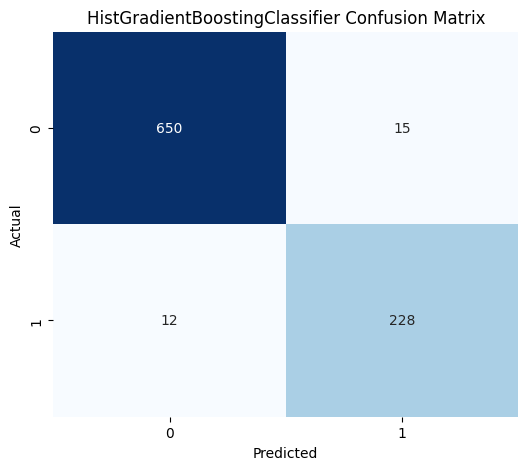

In [24]:
# Training
hgb = HistGradientBoostingClassifier(random_state=1)
hgb.fit(X_train, y_train)

# Prediksi
y_pred_hgb = hgb.predict(X_test)

# Confussion Matrix
cm_hgb = confusion_matrix(y_test, y_pred_hgb)

# Evaluation metrics
print("==== HistGradientBoostingClassifier ====")
print("Confusion Matrix:")
print(cm_hgb)
print("Classification Report:")
print(classification_report(y_test, y_pred_hgb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_hgb):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred_hgb, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred_hgb, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_test, y_pred_hgb, average='macro'):.4f}")
print("\n" + "-"*40 + "\n")

# Visualisasi
plt.figure(figsize=(6, 5))
sns.heatmap(cm_hgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('HistGradientBoostingClassifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

2. Modeling GradientBoostingClassifier

==== GradientBoostingClassifier ====
Confusion Matrix:
[[657   8]
 [ 23 217]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       665
           1       0.96      0.90      0.93       240

    accuracy                           0.97       905
   macro avg       0.97      0.95      0.96       905
weighted avg       0.97      0.97      0.97       905

Accuracy: 0.9657
Precision (macro): 0.9653
Recall (macro): 0.9461
F1-Score (macro): 0.9551

----------------------------------------



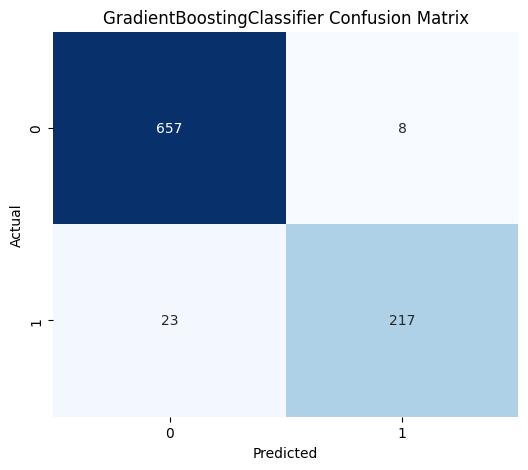

In [25]:
# Training
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, y_train)

# Prediksi
y_pred_gbc = gbc.predict(X_test)

# Confussion Matrix
cm_gbc = confusion_matrix(y_test, y_pred_gbc)

# Evaluation metrics
print("==== GradientBoostingClassifier ====")
print("Confusion Matrix:")
print(cm_gbc)
print("Classification Report:")
print(classification_report(y_test, y_pred_gbc))
print(f"Accuracy: {accuracy_score(y_test, y_pred_gbc):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred_gbc, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred_gbc, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_test, y_pred_gbc, average='macro'):.4f}")
print("\n" + "-"*40 + "\n")

# Visualisasi
plt.figure(figsize=(6, 5))
sns.heatmap(cm_gbc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('GradientBoostingClassifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

3. Modeling BaggingClassifier

==== BaggingClassifier ====
Confusion Matrix:
[[652  13]
 [ 16 224]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       665
           1       0.95      0.93      0.94       240

    accuracy                           0.97       905
   macro avg       0.96      0.96      0.96       905
weighted avg       0.97      0.97      0.97       905

Accuracy: 0.9680
Precision (macro): 0.9606
Recall (macro): 0.9569
F1-Score (macro): 0.9587

----------------------------------------



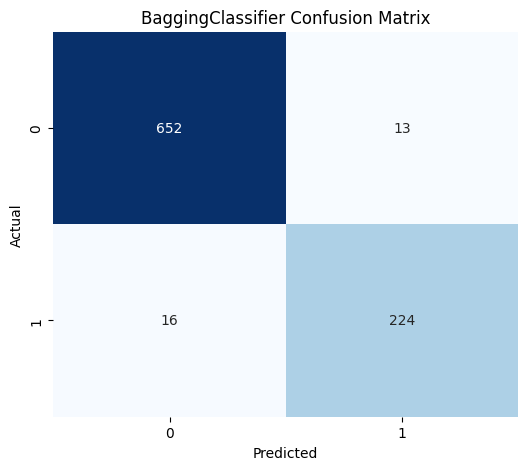

In [26]:
# Training
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

# Prediksi
y_pred_bagging = bagging.predict(X_test)

# Confussion Matrix
cm_bagging = confusion_matrix(y_test, y_pred_bagging)

# Evaluation metrics
print("==== BaggingClassifier ====")
print("Confusion Matrix:")
print(cm_bagging)
print("Classification Report:")
print(classification_report(y_test, y_pred_bagging))
print(f"Accuracy: {accuracy_score(y_test, y_pred_bagging):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred_bagging, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred_bagging, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_test, y_pred_bagging, average='macro'):.4f}")
print("\n" + "-"*40 + "\n")

# Visualisasi
plt.figure(figsize=(6, 5))
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('BaggingClassifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
# Siapkan bentuk input untuk konversi ONNX
initial_type = [('float_input', FloatTensorType([None, X.shape[1]]))]

# Konversi model ke ONNX
onnx_model = convert_sklearn(gbc, initial_types=initial_type, options={'zipmap': False})

# Simpan ke file
with open("gbc_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

from google.colab import files
files.download("gbc_model.onnx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>